In [1]:
!python -V

Python 3.8.10


In [2]:
!pip install pyarrow seaborn -q

In [3]:
import pandas as pd
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
def get_dataframe(file_train, file_test):
    pass

In [ ]:
def train_model():
    pass

In [ ]:
def test_model():
    pass

In [ ]:
def save_model():
    pass

In [6]:
df = pd.read_parquet('data/green_tripdata_2021-01.parquet')

In [7]:
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1         2  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2         2  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3         2  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
4         2  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           151              1.0           1.01   
1         1.0           166           239              1.0           2.53   
2         1.0            41            42              1.0           1.12   
3         1.0           168            75              1.0           1.99   
4         2.0           265           265              3.0           0.00   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          5.5    0.5      0.5        0.00           0.0      None   
1         10.0    0.5      0.5        2.81           0.0      None   
2          6.0    0.5      0.5        1.00           0.0      None   
3          8.0    0.5      0.5        0.00           0.0      None   
4        -52.0    0.0     -0.5        0.00           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          6.80           2.0        1.0   
1                    0.3         16.86           1.0        1.0   
2                    0.3          8.30           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                   -0.3        -52.80           3.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  2.75  
2                  0.00  
3                  0.00  
4                  0.00

In [8]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [9]:
# df = df[df['trip_type'] == 2]
# df.head()

In [10]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1         2  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2         2  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3         2  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
4         2  2021-01-01 00:16:36   2021-01-01 00:16:40                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           151              1.0           1.01   
1         1.0           166           239              1.0           2.53   
2         1.0            41            42              1.0           1.12   
3         1.0           168            75              1.0           1.99   
4         2.0           265           265              3.0           0.00   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0          5.5  ...      0.5        0.00           0.0       None   
1         10.0  ...      0.5        2.81           0.0       None   
2          6.0  ...      0.5        1.00           0.0       None   
3          8.0  ...      0.5        0.00           0.0       None   
4        -52.0  ...     -0.5        0.00           0.0       None   

  improvement_surcharge  total_amount  payment_type  trip_type  \
0                   0.3          6.80           2.0        1.0   
1                   0.3         16.86           1.0        1.0   
2                   0.3          8.30           1.0        1.0   
3                   0.3          9.30           2.0        1.0   
4                  -0.3        -52.80           3.0        1.0   

   congestion_surcharge  duration  
0                  0.00  3.933333  
1                  2.75  8.750000  
2                  0.00  5.966667  
3                  0.00  7.083333  
4                  0.00  0.066667  

[5 rows x 21 columns]

In [11]:
sns.displot(df['duration'])
plt.show()

In [12]:
df['duration'].describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [13]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
df.head()

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2021-01-01 00:15:56   2021-01-01 00:19:52                  N   
1         2  2021-01-01 00:25:59   2021-01-01 00:34:44                  N   
2         2  2021-01-01 00:45:57   2021-01-01 00:51:55                  N   
3         2  2020-12-31 23:57:51   2021-01-01 00:04:56                  N   
7         2  2021-01-01 00:26:31   2021-01-01 00:28:50                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            43           151              1.0           1.01   
1         1.0           166           239              1.0           2.53   
2         1.0            41            42              1.0           1.12   
3         1.0           168            75              1.0           1.99   
7         1.0            75            75              6.0           0.45   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0          5.5  ...      0.5        0.00           0.0       None   
1         10.0  ...      0.5        2.81           0.0       None   
2          6.0  ...      0.5        1.00           0.0       None   
3          8.0  ...      0.5        0.00           0.0       None   
7          3.5  ...      0.5        0.96           0.0       None   

  improvement_surcharge  total_amount  payment_type  trip_type  \
0                   0.3          6.80           2.0        1.0   
1                   0.3         16.86           1.0        1.0   
2                   0.3          8.30           1.0        1.0   
3                   0.3          9.30           2.0        1.0   
7                   0.3          5.76           1.0        1.0   

   congestion_surcharge  duration  
0                  0.00  3.933333  
1                  2.75  8.750000  
2                  0.00  5.966667  
3                  0.00  7.083333  
7                  0.00  2.316667  

[5 rows x 21 columns]

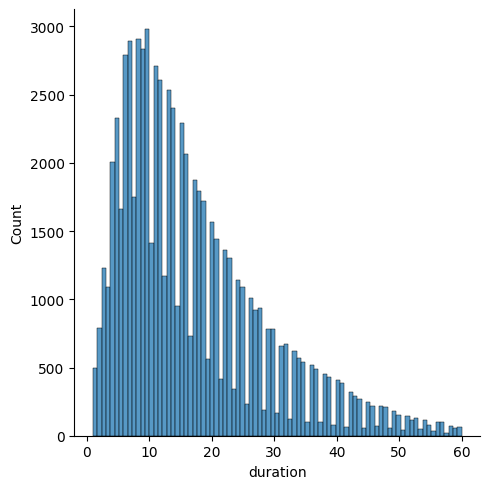

In [14]:
sns.displot(df['duration'])
plt.show()

In [15]:
df.columns.values
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [16]:
df[categorical] = df[categorical].astype(str)

In [17]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                     object
DOLocationID                     object
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                        object
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
duration                        float64
dtype: object

In [18]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [19]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [20]:
X_train

<73908x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221724 stored elements in Compressed Sparse Row format>

In [21]:
target = 'duration'
y_train = df[target].values

In [22]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lr.predict(X_train)

/home/neimv/Projects/camps/mlops/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/neimv/Projects/camps/mlops/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


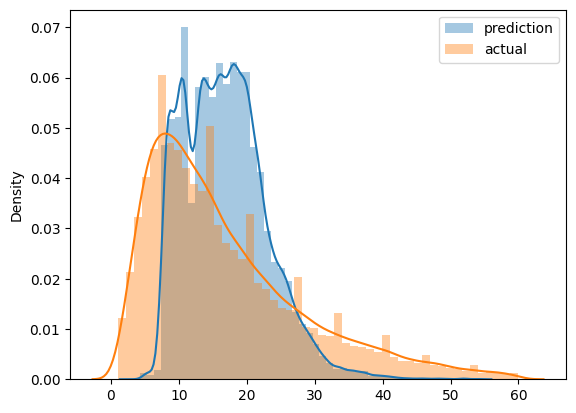

In [25]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [26]:
mean_squared_error(y_train, y_pred, squared=False)

9.827368941909368

In [27]:
lr = Lasso()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

11.562050466293025

In [28]:
lr = Ridge()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

10.236288428970282

In [29]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)